# Logistische Regression

Im [vorherigen Abschnitt](logistic_reg) wurde mit der log. Regression "vorhergesagt", ob ein Student die Prüfung bestehen wird oder nicht. Dies war ein sehr einfaches Beispiel und diente lediglich dem Verständnis.  

In diesem Abschnitt wird die log. Regression verwendet, um Bilder zu erkennen.

In [3]:
# import Bibliotheken
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import numpy as np
from numpy import asarray, load
#import cv2
from PIL import Image

## Datensatz laden

In [Kapitel 1](dataset1) wurde der Datensatz erzeugt. Jetzt wird dieser Datensatz geladen, um damit die log. Regression zu trainieren.

In [4]:
# Laden des Trainings- und Testdatensatzes

X_train=load('../01_Dataset/dataset_28x28/X_train.npy').astype(np.float32) * 1.0/255.0 # normalisieren
y_train=load('../01_Dataset/dataset_28x28/y_train.npy')
X_test=load('../01_Dataset/dataset_28x28/X_test.npy').astype(np.float32) * 1.0/255.0  # normalisieren
y_test=load('../01_Dataset/dataset_28x28/y_test.npy')

# Form und Anzahl der Datensätze
print(X_train.shape)
print("Anzahl Trainingsdaten: "+str(len(y_train)))
print(X_test.shape)
print("Anzahl Testdaten: "+str(len(y_test)))

(6421, 28, 28, 1)
Anzahl Trainingsdaten: 6421
(2753, 28, 28, 1)
Anzahl Testdaten: 2753


Der Datensatz enthält 6421 Trainings- und 2753 Testdatensätze, aus Schraubenkopfbildern der Größe 28x28 Pixel. 

## Datensatz Stichprobe

Das folgende Programm gibt zufällig ein Beispiel aus dem Trainingsdatensatz aus. Das gibt einen schnellen Einblick in die Daten:

Kategorie:1


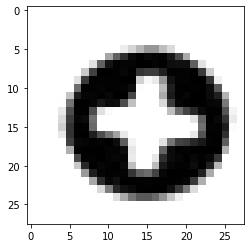

In [25]:
from random import randrange


# Kategorien:

# 0 = innensechskant
# 1 = philips
# 2 = pozidriv
# 3 = sechskant
# 4 = torx

# zufällig ein Beispiel aus dem Datensatz anzeigen
i=randrange(len(y_train))
# reshape von (28,28,1) zu (28,28)
plt.imshow(X_train[i].reshape(28,28),cmap='gray')
plt.show
print("Kategorie:"+ str(y_train[i]))

## Formatieren

Da das Neuron an jedem Eingang nur einen Wert erwartet, müssen die Bilder umgeformt werden. Alle Pixelwerte werden in einer Zeile, hintereinander angeordnet. Bei 28x28 Pixel ergeben sich 784 Eingänge für das Neuron.

In [6]:
# converting X, 28x28=784, die Pixelmatrix wird in einem Vektor umgeformt
X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)

# converting list to array
y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6421, 784)
(6421,)
(2753, 784)
(2753,)


## One-Hot-Encoding

Das logistische Regressionsmodell kann erstmal nur darauf trainiert werden, ein Objekt von anderen zu unterscheiden. Dafür müssen die Labels (y_train & y_test) umgewandelt werden. Bisher sind Werte von 0 bis 4 enthalten, die für die jeweilige Kategorie stehen. Da die logistische Regression nur mit Werten zwischen 0 und 1 arbeiten kann, müssen die Labels dem so genannten "One-Hot-Encoding" unterzogen werden.  


In [7]:
# auf eine Klasse trainieren, One-Hot-Encoding
print("One-Hot_Encoded:")
# 3 = sechskant
y_train_3=y_train == 3 # False,True,...
y_test_3 =y_test == 3
print(y_train_3)

# False,True,... in Werte zw. 0...1 umwandeln
y_train_3 = y_train_3.astype(np.float32) 
y_test_3 = y_test_3.astype(np.float32) 

print("Umwandlung in Float-Werte:")
print(y_train_3)
print(y_train)

One-Hot_Encoded:
[False False False ... False False False]
Umwandlung in Float-Werte:
[0. 0. 0. ... 0. 0. 0.]
[4 1 0 ... 4 4 4]


## ## Modell trainieren (Sechkant)

In [9]:
from scipy.special import expit


def S(x):
    return expit(x)
    # return 1 / (1 + np.exp(-x))


def f(w, b, x):
    return S(w @ x.T + b)


def J(w, b, x, y):
    return -np.mean(y * np.log(f(w, b, x)) + \
                    (1 - y) * np.log(1 - f(w, b, x)))


def J_ableitung_w(w, b, x, y):
    e = f(w, b, x) - y
    return np.mean(x.T * e, axis=1)


def J_ableitung_b(w, b, x, y):
    return np.mean(f(w, b, x) - y)

# print(X_train.shape)
# exit()
lr = 0.01
w = np.zeros((1, 784)) # bei der NUll ist Steigung am größten->numerisch besser
b = 1
for i in range(0, 500):

    dw = J_ableitung_w(w, b, X_train, y_train_3) # y_train_3 = Sechskant
    db = J_ableitung_b(w, b, X_train, y_train_3)

    w = w - lr * dw
    b = b - lr * db

    cost = J(w, b, X_train, y_train_3)
    print("Kosten: " + str(cost))
    
# Quelle. Jannis Seemann, Udemy-Kurs Deep Learning (unveröffentlicht)

Kosten: 0.42289340183108526
Kosten: 0.39025636130448693
Kosten: 0.37023593326767007
Kosten: 0.35319485045124654
Kosten: 0.33777629019299793
Kosten: 0.32363103919505287
Kosten: 0.31059615214831926
Kosten: 0.29855409078903256
Kosten: 0.2874048433514228
Kosten: 0.2770598654516103
Kosten: 0.267440310808401
Kosten: 0.2584760330348266
Kosten: 0.2501047056282456
Kosten: 0.24227097885582088
Kosten: 0.23492568648110618
Kosten: 0.228025118282468
Kosten: 0.22153036538807527
Kosten: 0.2154067385081702
Kosten: 0.2096232551825004
Kosten: 0.20415219025331777
Kosten: 0.19896868308511817
Kosten: 0.19405039504214996
Kosten: 0.18937721108276206
Kosten: 0.18493097984893564
Kosten: 0.18069528721212555
Kosten: 0.17665525882198238
Kosten: 0.17279738775971837
Kosten: 0.16910938390654795
Kosten: 0.1655800420934835
Kosten: 0.16219912650114526
Kosten: 0.1589572691297648
Kosten: 0.15584588046436387
Kosten: 0.15285707072306634
Kosten: 0.14998358030251
Kosten: 0.14721871822816177
Kosten: 0.1445563075832875
Kosten: 

## Modell Genauigkeit (Sechskant)

In [23]:
# Testbilder bei denen das Modell über 50 % wahrscheinlichkeit dafür ausgibt, dass es sich um eine Sechskantschraube handelt.
y_test_pred = f(w, b, X_test) > 0.5 # False True False...

# umformen 
y_test_pred = y_test_pred.reshape(-1)

# [True False] ->> [1. 0.]
y_test_pred=y_test_pred.astype(np.float32)

# Genauigkeit berechnen
print("erreichte Genauigkeit: "+ str(np.mean(y_test_3 == y_test_pred)*100)+ " %")

# Anteil der Klasse am Gesamten Testdatensatz
imgs=0
for i in range(0, len(X_test)):
    if y_test_3[i]==1:
        imgs=imgs + 1
print(str(imgs)+" Sechskant von insgesamt "+str(len(y_test_3))+" Testbildern.")
print("Anteil = " +str(imgs/len(y_test_3)))

erreichte Genauigkeit: 100.0 %
575 Sechskant von insgesamt 2753 Testbildern.
Anteil = 0.20886305848165637


Die logistische Regression konnte alle Sechskant-Bilder korrekt von allen anderen unterscheiden. Das entspricht einer Genauigkeit von 100$~$%, ein sehr gutes Ergebnis für dieses einfache Modell. Die Ursache für das sehr gute Ergebnis, liegt darin begründet, dass sich der Sechskant sehr deutlich von den anderen Schraubenklassen unterscheidet. Die Erkennung der Schraubenarten Innensechskant, Philips, Pozidriv und Torx, war für dieses Modell kaum noch möglich.  

## Modell trainieren (Innensechkant)

In [28]:
# auf eine Klasse trainieren, One-Hot-Encoding
# 0 = Innensechskant
y_train_0=y_train == 0 # False,True,...
y_test_0 =y_test == 0

# False,True,... in Werte zw. 0...1 umwandeln
y_train_0 = y_train_0.astype(np.float32) 
y_test_0 = y_test_0.astype(np.float32) 

# Modell trainieren
lr = 0.01
w = np.zeros((1, 784)) # bei der NUll ist Steigung am größten->numerisch besser
b = 1
for i in range(0, 500):

    dw = J_ableitung_w(w, b, X_train, y_train_0) # y_train_0 = Innensechskant
    db = J_ableitung_b(w, b, X_train, y_train_0)

    w = w - lr * dw
    b = b - lr * db

    cost = J(w, b, X_train, y_train_0)
    print("Kosten: " + str(cost))

One-Hot_Encoded:
[False False  True ... False False False]
Kosten: 0.4818346186250685
Kosten: 0.46103999268174495
Kosten: 0.45009265731350745
Kosten: 0.44100208784447387
Kosten: 0.4328362271202209
Kosten: 0.4253885669508601
Kosten: 0.4185656701155267
Kosten: 0.4122985703656496
Kosten: 0.40652802270304905
Kosten: 0.4012016284027364
Kosten: 0.39627289871356913
Kosten: 0.3917006241504276
Kosten: 0.38744830567420324
Kosten: 0.38348362559914456
Kosten: 0.37977796287586074
Kosten: 0.3763059558036491
Kosten: 0.37304511178794675
Kosten: 0.3699754616314478
Kosten: 0.3670792548070002
Kosten: 0.3643406917716148
Kosten: 0.36174568935797596
Kosten: 0.3592816754560544
Kosten: 0.3569374094756466
Kosten: 0.3547028254035497
Kosten: 0.35256889460242524
Kosten: 0.35052750582234826
Kosten: 0.3485713601994376
Kosten: 0.34669387929342843
Kosten: 0.34488912446551884
Kosten: 0.34315172611949357
Kosten: 0.3414768215243608
Kosten: 0.33986000010757894
Kosten: 0.338297255256729
Kosten: 0.3367849417966203
Kosten: 

## Modell Genauigkeit (Innensechskant)

In [77]:
# Testbilder bei denen das Modell über 50 % wahrscheinlichkeit dafür ausbibt, dass es sich um Innensechskant handelt.
y_test_pred = f(w, b, X_test) > 0.5 # False True False...

# umformen 
y_test_pred = y_test_pred.reshape(-1)

# [True False] ->> [1. 0.]
y_test_pred=y_test_pred.astype(np.float32)



# Anteil der Klasse am Gesamten Testdatensatz
imgs_0 = 0
for i in range(0, len(X_test)):
    if y_test_0[i] == 1:
        imgs_0 = imgs_0 + 1
print("von insgesamt " + str(len(y_test_0)) + " Testbildern, sind " + str(imgs_0) + " Innensechskant.")
print("Anteil am gesamten Testdatensatz = " + str(round(imgs_0*100 / len(y_test_0),1)) + " %")

# Genauigkeit berechnen
print("Genauigkeit (scheinbar) : "+ str(round(np.mean(y_test_0 == y_test_pred)*100,1))+ " % ")

# Wie viel und welche Bilder wurden falsch erkannt?
imgs=0

for i in range(0, len(X_test)):
    
    if y_test_pred[i] != y_test_0[i]:
        #plt.imshow(X_test[i].reshape(28,28),cmap='gray')
        #plt.show()
        #print(i)
        imgs=imgs + 1
        #print(imgs)

print(str(imgs) + " von "+ str(imgs_0)+ " Innensechskantschrauben, wurden falsch erkannt.")

print("Die echte Genauigkeit beträgt somit lediglich " + str(round((1-imgs/imgs_0)*100,1))+" %.")

von insgesamt 2753 Testbildern, sind 533 Innensechskant.
Anteil am gesamten Testdatensatz = 19.4 %
Genauigkeit (scheinbar) : 93.7 % 
174 von 533 Innensechskantschrauben, wurden falsch erkannt.
Die echte Genauigkeit beträgt somit lediglich 67.4 %.


Um einen Eindruck davon zu bekommen, bei welchen Bildern das Modell Schwierigkeiten hatte eine korrekte Vorhersage zu machen, werden einige dieser Bilder mit dem folgenden Programmcode angezeigt:

## Falsch-Erkennung

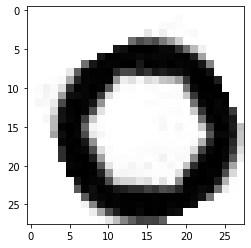

15


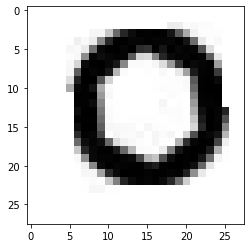

18


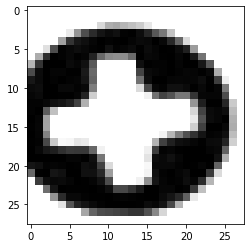

32


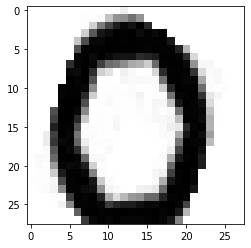

63


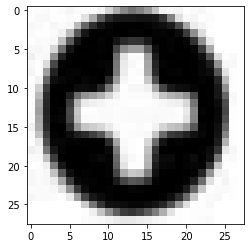

64


In [74]:
imgs=0

for i in range(0, 100):
    
    if y_test_pred[i] != y_test_0[i]:
        plt.imshow(X_test[i].reshape(28,28),cmap='gray')
        plt.show()
        print(i)
        imgs=imgs + 1

Es wurden schon leicht veränderte Bilder nicht mehr korrekt erkannt.

**Die log. Regression (ein Neuron) kann lernen Bilder zu erkennen, ist aber wie erwartet nicht sehr leistungsfähig.  
Im nächsten Abschnitt werden die ersten Schritte hin zu neuronalen Netzen gemacht**